# Sketch


Sketch is a package designed to help analysis in pandas. If you are working with data in a dataframe sketch takes in natural language and makes suggestions for pandas code to answer your data analysis question

This notebook is based on https://github.com/approximatelabs/sketch

First we install sketch. This can be done from inside jupyter using !pip or it can be done from an external terminal using pip install or conda install

In [2]:
# !pip install sketch

In [4]:
import pandas as pd
import sketch

In [17]:
df = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/employee_data.csv?raw=true')

In [19]:
df.head()

,Unnamed: 0,Gross_Pay,Name,Sex,DOB,Age,Join_Date,Tenure,Role,Dept
0,0,220212.00,'Dianne Olson',F,23/02/1991,29,01/07/2013,84,'Software Engineer.Senior II.','Enterprise Applications'
1,1,330468.75,'Deshawn Donaldson',M,26/02/1984,36,24/04/2017,38,'Software Engineer.Senior II Lead.','Media Portal'
2,2,117429.00,'Patty Prince',F,29/01/1993,27,01/06/2015,61,'Security Operations Center Specialist..','APJ Security Services - SOCC'
3,3,113674.00,'Elisa Benson',F,31/05/1990,30,17/04/2017,38,'Software Engineer II..','Enterprise Applications'
4,4,126812.50,'Carl Finley',M,15/01/1993,27,04/06/2018,25,'Technical Solutions Engineer.Associate.','AmaTec - Americas TSE'


In [26]:
print(dir(df.sketch))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obj', 'apply', 'ask', 'howto']


We can see we have 3 main methods (the parts of the class without __ __). Or we could use help. These are apply ask and howto

In [27]:
help(df.sketch)

Help on SketchHelper in module sketch.pandas_extension object:

class SketchHelper(builtins.object)
 |  SketchHelper(pandas_obj)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, pandas_obj)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply(self, prompt_template_string, **kwargs)
 |  
 |  ask(self, question, call_display=True)
 |  
 |  howto(self, how, call_display=True)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



### Ask

This is great for gaining quick insights about your data

In [29]:
df.sketch.ask('how many columns in my data')

lets check 

In [49]:
len(df.columns)

10

This does not seem to match. Lets explore more

In [30]:
df.sketch.ask('provide a list of the column names in my data')

In [50]:
df.columns

Index(['Unnamed: 0', 'Gross_Pay', 'Name', 'Sex', 'DOB', 'Age', 'Join_Date',
       'Tenure', 'Role', 'Dept'],
      dtype='object')

The agree here so the first answer seems a bit odd

In [31]:
df.sketch.ask('Calculate the mean of the gross pay column')

Lets check

In [56]:
df.Gross_Pay.mean()

194902.79696969697

Again we are seeing a difference. Maybe sketch has done some cleaning here so we dont know?

In [57]:
df.sketch.ask('What is the oldest and youngest employee')

Lets check

In [60]:
df.Age.max(), df.Age.min()

(56, 21)

Correct !

In [33]:
df.sketch.ask('What Department has the most employees and what role had the most employees within that')

So we can ask more complicated questions. Lets check the last one

In [44]:
df.Dept.value_counts()

'Enterprise Applications'                     89
'Finance - Customer Revenue Operations GA'    85
'IT DevOps'                                   84
'Platform Operations'                         74
'Corporate Systems'                           71
'Americas- AMG'                               70
'AmaTec - Americas TSE'                       65
'APJ Security Services - SOCC'                50
'Enterprise Infrastructure Services'          47
'Media Portal'                                41
'Media Analytics'                             40
'Networks - APJ Infrastructure'               35
'LUNA/OPEN Engineering'                       33
'Service Delivery Americas Web'               32
'Media Services Engineering'                  31
'GSS EPIC Engineering (HC COGS)'              30
'Enterprise Access Engineering'               30
'Dynamic Media SQA'                           30
'AmaTec - APJ TSE'                            28
'Networks - EMEA Infrastructure'              25
Name: Dept, dtype: i

The return from sketch is clearly wrong heremm


#### Conclusion to ask is take care ! It can be misleading

### howto

Howto is the basic "code-writing" prompt in sketch. This will return a code-block you should be able to copy paste and use as a starting point (or possibly ending!) for any question you have to ask of the data. Ask this how to clean the data, normalize, create new features, plot, and even build models!

##### howto example 1

In [61]:
df.sketch.howto("plot department against employee number")

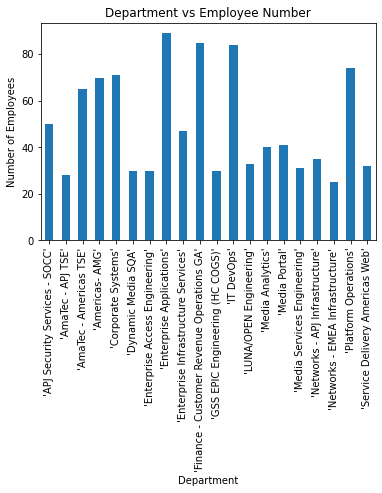

In [62]:
# import matplotlib library
import matplotlib.pyplot as plt

# create a bar chart of department vs employee number
df.groupby('Dept')['Name'].count().plot(kind='bar')

# set the title and labels
plt.title('Department vs Employee Number')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

# show the plot
plt.show()

This looks correct however lets check outselves. We shall use seaborn to create  histogram

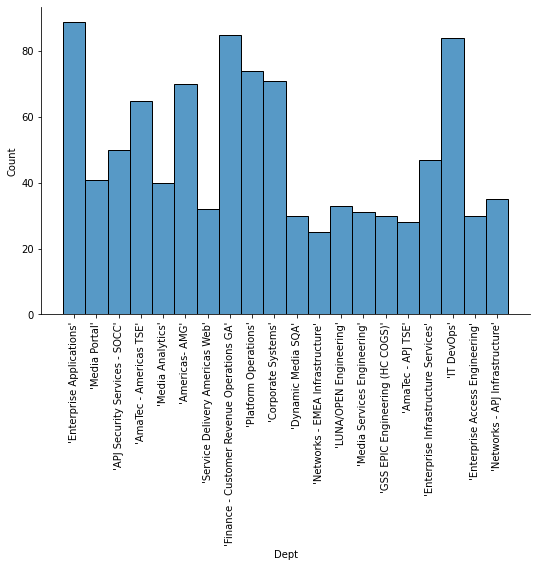

In [69]:
import seaborn as sns
sns.displot(data = df, x = 'Dept')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

When you compare the values they are similar. All good there 

##### Howto example 2

In [70]:
df.sketch.howto("produce a scatter plot of agae against gross pay. I would like a regression line on the plot")

NameError: name 'np' is not defined

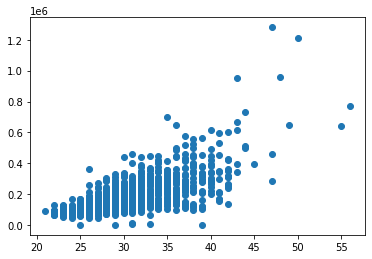

In [71]:
import matplotlib.pyplot as plt

# Create a scatter plot of age against gross pay
plt.scatter(df['Age'], df['Gross_Pay'])

# Calculate the linear regression line
slope, intercept = np.polyfit(df['Age'], df['Gross_Pay'], 1)

# Add the regression line to the plot
plt.plot(df['Age'], slope*df['Age'] + intercept, '-r')

# Show the plot
plt.show()

Note here it did not ask us to bring in numpy so we shall do that now

In [72]:
import numpy as np

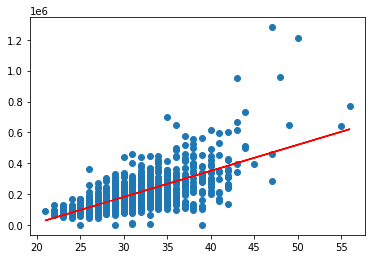

In [73]:
import matplotlib.pyplot as plt

# Create a scatter plot of age against gross pay
plt.scatter(df['Age'], df['Gross_Pay'])

# Calculate the linear regression line
slope, intercept = np.polyfit(df['Age'], df['Gross_Pay'], 1)

# Add the regression line to the plot
plt.plot(df['Age'], slope*df['Age'] + intercept, '-r')

# Show the plot
plt.show()

This looks correct to me. I would have again used reg plot from seaborn but it does do the task well


<AxesSubplot:xlabel='Age', ylabel='Gross_Pay'>

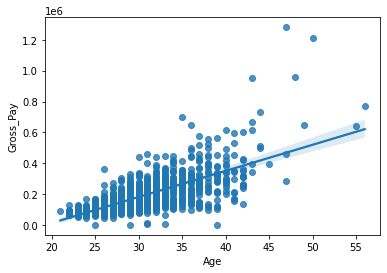

In [74]:
sns.regplot(data = df, x = 'Age', y = 'Gross_Pay')

We can see the plots are the same. 

#### howto example 3

In [76]:
df.sketch.howto("How to output a dataframe of mean gross pay for each department")

In [77]:
# Calculate mean gross pay for each department
mean_gross_pay_by_dept = df.groupby('Dept')['Gross_Pay'].mean()

# Output dataframe of mean gross pay for each department
mean_gross_pay_by_dept_df = pd.DataFrame(mean_gross_pay_by_dept).reset_index()
print(mean_gross_pay_by_dept_df)

                                          Dept      Gross_Pay
0               'APJ Security Services - SOCC'  227722.280000
1                           'AmaTec - APJ TSE'  131984.571429
2                      'AmaTec - Americas TSE'  139486.000000
3                              'Americas- AMG'  141739.989286
4                          'Corporate Systems'  238698.602113
5                          'Dynamic Media SQA'  186053.691667
6              'Enterprise Access Engineering'  369936.583333
7                    'Enterprise Applications'  224186.761236
8         'Enterprise Infrastructure Services'  201105.664894
9   'Finance - Customer Revenue Operations GA'  136004.791176
10            'GSS EPIC Engineering (HC COGS)'  219507.150000
11                                 'IT DevOps'  188701.217262
12                     'LUNA/OPEN Engineering'  243485.045455
13                           'Media Analytics'  279327.312500
14                              'Media Portal'  256766.006098
15      

This looks fine to me

#### howto example 4

In [79]:
df.sketch.howto("""How to create a column called testwhich 
will be the result of Gross_Pay divided by age. 
Take this column test and produce a table on mean max
and min of test grouped against department and rol""")

In [80]:
# Create a new column called 'test'
df['test'] = df['Gross_Pay'] / df['Age']

# Group the dataframe by department and role
grouped_df = df.groupby(['Dept', 'Role'])

# Calculate the mean, max, and min of the 'test' column
stats = grouped_df['test'].agg(['mean', 'max', 'min'])

# Print the results
print(stats)

                                                                                         mean  \
Dept                            Role                                                            
'APJ Security Services - SOCC'  'Director..Service Line'                         19967.285714   
                                'Escalation Manager..'                            8281.190476   
                                'Practice Manager..'                             13292.839461   
                                'Practice Manager.Senior.'                       12893.963415   
                                'Security Operations Center Network Engineer..'   9133.137453   
...                                                                                       ...   
'Service Delivery Americas Web' 'Solutions Architect II..'                        6314.490262   
                                'Solutions Architect..'                           5041.463139   
                              

#### Example 5

In [115]:
medals = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/medals_tally.csv?raw=true')
medals.head()

,Unnamed: 0,Year,NOC,Country,Sport,Event,Medal,Sex,ID,Age,Height,Weight,Medal_Won,Team_Event,Individual_Event,Medal_Count
0,0,1896,AUS,Australia,Athletics,"Athletics Men's 1,500 metres",Gold,M,35698,22.0,0.0,0.0,1,0,1,1.0
1,1,1896,AUS,Australia,Athletics,Athletics Men's 800 metres,Gold,M,35698,22.0,0.0,0.0,1,0,1,1.0
2,2,1896,AUS,Australia,Tennis,Tennis Men's Doubles,Bronze,M,35698,22.0,0.0,0.0,1,1,0,1.0
3,3,1896,AUT,Austria,Cycling,"Cycling Men's 10,000 metres",Bronze,M,107006,23.0,0.0,0.0,1,0,1,1.0
4,4,1896,AUT,Austria,Cycling,Cycling Men's 12-Hours Race,Gold,M,107006,23.0,0.0,0.0,1,0,1,1.0


In [117]:
medals.sketch.howto(""" using plotly express plot the number of gold medals won per country at the 2000 olympic games on a map""")

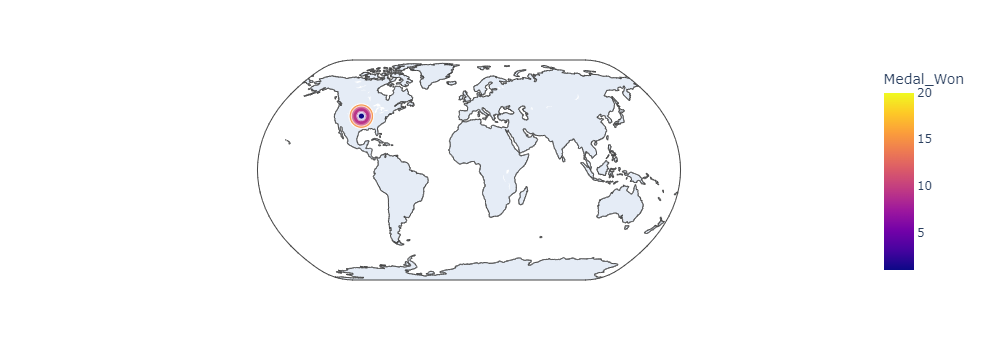

In [124]:
import plotly.express as px

fig = px.scatter_geo(medals[(medals['Year'] == 1996) & (medals['Medal'] == 'Gold')], 
                     locations="Country", 
                     color="Medal_Won", 
                     hover_name="Country", 
                     size="Medal_Won", 
                     projection="natural earth")
fig.show()

#### howto conclusion

This mostly seems to work well till the last example. It does not write the most consise code but it does seem to agree

## The apply function

apply is a more advanced prompt that is more useful for data generation. Use it to parse fields, generate new features, and more. This is built directly on lambdaprompt. In order to use this, you will need to set up a free account with OpenAI, and set an environment variable with your API key. OPENAI_API_KEY=YOUR_API_KEY

So you will have to regsiter your own api key for openAI. I will use mine here as an example

In [125]:
api_key = "................"

In [127]:
import os
os.environ["SKETCH_USE_REMOTE_LAMBDAPROMPT"] =  "False"
os.environ["OPENAI_API_KEY"] =  api_key

In [92]:
data = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/IMDB_Dataset_Sample.csv?raw=true')

In [153]:
populations = pd.DataFrame(['Colorado', 'Kansas', 'California', 'New York'], columns = ['state'])
populations

,state
0,Colorado
1,Kansas
2,California
3,New York


In [158]:
populations['state_capitol'] = populations.sketch.apply("What is the capitol of [{{ state }}]?")
populations['state_population'] = populations.sketch.apply("What is the population of [{{ state}}]. Provide it as an integer number on the most recent data?")
populations

,state,state_capitol,state_population
0,Colorado,\n\nDenver,"\n\n5,758,736"
1,Kansas,\n\nTopeka,"\n\n2,913,314"
2,California,\n\nSacramento,"\n\n39,512,223"
3,New York,\n\nAlbany.,"\n\n19,453,561"


### Conclusion

The combination with chat GPT3 is pretty cool and I can see it will have many uses